# Importing Modules for project

In [440]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Using pandas.read_csv function, I will read in the data for my project. I will then use the .merge function to merge my to datasets by the player column in both datasets. This will give me the Fantasy points and when the player was drafted on average in the same dataset.

In [441]:
df = pd.read_csv('fantasyfootball.csv')
df_2 = pd.read_csv('fantasyfootballrank.csv')
final_df = pd.merge(df, df_2, on = "Player", how = "inner")
final_df.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,VBD,PosRank,OvRank,-9999,RK,Team,Position,AVG,Min,Max
0,1,Patrick Mahomes,KAN,QB,27,17,17,435,648,5250,...,136.0,1,1.0,MahoPa00,47,KC,QB,52.4,40.0,69.0
1,2,Josh Jacobs,LVR,RB,24,17,17,0,0,0,...,127.0,1,2.0,JacoJo01,54,LV,RB,56.0,44.0,64.0
2,3,Christian McCaffrey,2TM,RB,26,17,16,1,1,34,...,123.0,2,3.0,McCaCh01,1,CAR,RB,1.2,1.0,2.0
3,5,Justin Jefferson,MIN,WR,23,17,17,2,2,34,...,119.0,1,5.0,JeffJu00,5,MIN,WR,6.0,3.0,10.0
4,6,Austin Ekeler,LAC,RB,27,17,17,0,0,0,...,118.0,4,6.0,EkelAu00,3,LAC,RB,4.4,2.0,7.0


# Clean Data

Now, I will clean my data to get my dataset in a format that I want to work with. There are many columns that I don't need. I will use .drop function to remove those. I also have columns that need to be renamed so I'll use the .rename function to name these so it is easier to know what the column represents.

In [442]:
final_df = final_df.drop(['Fmb','FL','2PM' ,'2PP', 'DKPt' , 'FDPt' , 'VBD' , 'PosRank' , 'OvRank' , '-9999', 'Team' , 'Position', 'Min' , 'Max','Rk', 'RK', ], axis=1)
final_df = final_df.rename(columns={'Tm': 'Team', 'FantPos': 'Position', 'Yds': 'PassingYds','TD.3': 'AllTD', 'Att': 'PassAtt', 'Yds.2': 'RecYds', 'TD.2': 'RecTD','TD.1':'RushTD','TD':'PassTD','Att.1': 'RushAtt', 'Yd.1':'RushYds','PPR': 'FantasyPoints', 'AVG': 'AverageDraftPosition','Yds.1': 'RushYds'})
final_df.head()

,Player,Team,Position,Age,G,GS,Cmp,PassAtt,PassingYds,PassTD,...,RushTD,Tgt,Rec,RecYds,Y/R,RecTD,AllTD,FantPt,FantasyPoints,AverageDraftPosition
0,Patrick Mahomes,KAN,QB,27,17,17,435,648,5250,41,...,4,1,1,6,6.00,0,4,416.0,417.4,52.4
1,Josh Jacobs,LVR,RB,24,17,17,0,0,0,0,...,12,64,53,400,7.55,0,12,275.0,328.3,56.0
2,Christian McCaffrey,2TM,RB,26,17,16,1,1,34,1,...,8,108,85,741,8.72,5,13,271.0,356.4,1.2
3,Justin Jefferson,MIN,WR,23,17,17,2,2,34,0,...,1,184,128,1809,14.13,8,9,241.0,368.7,6.0
4,Austin Ekeler,LAC,RB,27,17,17,0,0,0,0,...,13,127,107,722,6.75,5,18,266.0,372.7,4.4


# Analyze Data

I want to put the data into separate dataframes based on the position the football player plays. This will allow me to view the data for each position individually and then I can view them in comparison with each other. I will create each dataframe for running backs, quarterbacks, wide recievers, and tight ends. I will then create variables equal to the columns I want to include for each. I then create a function that allows me set the columns equal to each dataframe represent by position.

In [443]:

rushing_column = ['RushAtt', 'RushYds', 'Y/A', 'RushTD', 'AllTD']
recieving_column = ['Tgt', 'Rec', 'RecYds', 'Y/R', 'RecTD']
passing_column = ['Cmp', 'PassAtt', 'PassingYds', 'PassTD', 'Int']


def separate_position_df(df, position):
    return df[df['Position'] == position]

rb_df = separate_position_df(final_df, 'RB')
qb_df = separate_position_df(final_df, 'QB')
wr_df = separate_position_df(final_df, 'WR')
te_df = separate_position_df(final_df, 'TE')

rb_df.head()




,Player,Team,Position,Age,G,GS,Cmp,PassAtt,PassingYds,PassTD,...,RushTD,Tgt,Rec,RecYds,Y/R,RecTD,AllTD,FantPt,FantasyPoints,AverageDraftPosition
1,Josh Jacobs,LVR,RB,24,17,17,0,0,0,0,...,12,64,53,400,7.55,0,12,275.0,328.3,56.0
2,Christian McCaffrey,2TM,RB,26,17,16,1,1,34,1,...,8,108,85,741,8.72,5,13,271.0,356.4,1.2
4,Austin Ekeler,LAC,RB,27,17,17,0,0,0,0,...,13,127,107,722,6.75,5,18,266.0,372.7,4.4
8,Nick Chubb,CLE,RB,27,17,17,0,0,0,0,...,12,37,27,239,8.85,1,13,254.0,281.4,29.6
13,Saquon Barkley,NYG,RB,25,16,16,0,0,0,0,...,10,76,57,338,5.93,0,10,227.0,284.0,12.4


In [444]:
def position_columns(df, new_column):
    df = df[['Player', 'Position', 'Team', 'G', 'GS','FantasyPoints', 'Age', 'AverageDraftPosition'] + new_column]
    return df

wr_df = position_columns(wr_df, recieving_column + rushing_column)

In [445]:
qb_df = position_columns(qb_df, passing_column + rushing_column)

In [446]:
te_df = position_columns(te_df, recieving_column + rushing_column)

In [447]:
rb_df = position_columns(rb_df, recieving_column+rushing_column)

In [448]:
def calculate_fantasy_points_per_game(df, position):
    position_df = df[df['Position'] == position]
    position_df['FantasyPoints/GM'] = position_df['FantasyPoints'] / position_df['G']
    position_df['FantasyPoints/GM'] = position_df['FantasyPoints/GM'].apply(lambda x: round(x, 2))
    return position_df



calculate_fantasy_points_per_game(rb_df, 'RB')

rb_df = calculate_fantasy_points_per_game(rb_df, 'RB')
rb_df.head()


,Player,Position,Team,G,GS,FantasyPoints,Age,AverageDraftPosition,Tgt,Rec,RecYds,Y/R,RecTD,RushAtt,RushYds,Y/A,RushTD,AllTD,FantasyPoints/GM
1,Josh Jacobs,RB,LVR,17,17,328.3,24,56.0,64,53,400,7.55,0,340,1653,4.86,12,12,19.31
2,Christian McCaffrey,RB,2TM,17,16,356.4,26,1.2,108,85,741,8.72,5,244,1139,4.67,8,13,20.96
4,Austin Ekeler,RB,LAC,17,17,372.7,27,4.4,127,107,722,6.75,5,204,915,4.49,13,18,21.92
8,Nick Chubb,RB,CLE,17,17,281.4,27,29.6,37,27,239,8.85,1,302,1525,5.05,12,13,16.55
13,Saquon Barkley,RB,NYG,16,16,284.0,25,12.4,76,57,338,5.93,0,295,1312,4.45,10,10,17.75


In [449]:
calculate_fantasy_points_per_game(wr_df, 'WR')

wr_df = calculate_fantasy_points_per_game(wr_df, 'WR')
wr_df.head()

,Player,Position,Team,G,GS,FantasyPoints,Age,AverageDraftPosition,Tgt,Rec,RecYds,Y/R,RecTD,RushAtt,RushYds,Y/A,RushTD,AllTD,FantasyPoints/GM
3,Justin Jefferson,WR,MIN,17,17,368.7,23,6.0,184,128,1809,14.13,8,4,24,6.00,1,9,21.69
7,Davante Adams,WR,LVR,17,17,335.5,30,13.2,180,100,1516,15.16,14,3,-1,-0.33,0,14,19.74
9,Tyreek Hill,WR,MIA,17,17,347.2,28,29.2,170,119,1710,14.37,7,7,32,4.57,1,9,20.42
11,A.J. Brown,WR,PHI,17,16,299.6,25,22.6,145,88,1496,17.00,11,0,0,NaN,0,11,17.62
12,Stefon Diggs,WR,BUF,16,16,316.6,29,11.4,154,108,1429,13.23,11,1,-3,-3.00,0,11,19.79


In [450]:
calculate_fantasy_points_per_game(te_df, 'TE')
te_df = calculate_fantasy_points_per_game(te_df, 'TE')
te_df.head()

,Player,Position,Team,G,GS,FantasyPoints,Age,AverageDraftPosition,Tgt,Rec,RecYds,Y/R,RecTD,RushAtt,RushYds,Y/A,RushTD,AllTD,FantasyPoints/GM
6,Travis Kelce,TE,KAN,17,17,316.3,33,14.0,152,110,1338,12.16,12,2,5,2.50,0,12,18.61
21,George Kittle,TE,SFO,15,15,200.5,29,51.4,86,60,765,12.75,11,0,0,NaN,0,11,13.37
23,Taysom Hill,TE,NOR,16,8,145.8,32,345.0,13,9,77,8.56,2,96,575,5.99,7,9,9.11
27,T.J. Hockenson,TE,2TM,17,14,215.4,25,84.4,129,86,914,10.63,6,0,0,NaN,0,6,12.67
38,Mark Andrews,TE,BAL,15,15,190.5,27,22.4,113,73,847,11.60,5,3,8,2.67,0,5,12.70


In [451]:
calculate_fantasy_points_per_game(qb_df, 'QB')
qb_df = calculate_fantasy_points_per_game(qb_df, 'QB')
qb_df.head()

,Player,Position,Team,G,GS,FantasyPoints,Age,AverageDraftPosition,Cmp,PassAtt,PassingYds,PassTD,Int,RushAtt,RushYds,Y/A,RushTD,AllTD,FantasyPoints/GM
0,Patrick Mahomes,QB,KAN,17,17,417.4,27,52.40,435,648,5250,41,12,61,358,5.87,4,4,24.55
5,Josh Allen,QB,BUF,16,16,395.5,26,36.00,359,567,4283,35,14,124,762,6.15,7,7,24.72
10,Jalen Hurts,QB,PHI,15,15,378.0,24,59.60,306,460,3701,22,6,165,760,4.61,13,13,25.20
15,Joe Burrow,QB,CIN,16,16,350.7,26,72.00,414,606,4475,35,12,75,257,3.43,5,5,21.92
39,Geno Smith,QB,SEA,17,17,303.9,32,360.75,399,572,4282,30,11,68,366,5.38,1,1,17.88


## I created this function because I wanted a new Rank column in my positional dataframes. This will allow me to see how each players ranks on fantasy points per game. I believe this will take my data visualization to the next level and to be able to see how players ranked and see where they were drafted in the same data plot.

In [452]:
def rank_players(df):
    df['Rank'] = df['FantasyPoints/GM'].rank(ascending=False, method='dense')
    return df





In [453]:
rank_players(rb_df)
rb_df = rb_df.sort_values(by=['Rank'])
rb_df.head(50)



,Player,Position,Team,G,GS,FantasyPoints,Age,AverageDraftPosition,Tgt,Rec,RecYds,Y/R,RecTD,RushAtt,RushYds,Y/A,RushTD,AllTD,FantasyPoints/GM,Rank
4,Austin Ekeler,RB,LAC,17,17,372.7,27,4.40,127,107,722,6.75,5,204,915,4.49,13,18,21.92,1.0
2,Christian McCaffrey,RB,2TM,17,16,356.4,26,1.20,108,85,741,8.72,5,244,1139,4.67,8,13,20.96,2.0
1,Josh Jacobs,RB,LVR,17,17,328.3,24,56.00,64,53,400,7.55,0,340,1653,4.86,12,12,19.31,3.0
13,Saquon Barkley,RB,NYG,16,16,284.0,25,12.40,76,57,338,5.93,0,295,1312,4.45,10,10,17.75,4.0
32,Joe Mixon,RB,CIN,14,14,239.5,26,10.00,75,60,441,7.35,2,210,814,3.88,7,9,17.11,5.0
8,Nick Chubb,RB,CLE,17,17,281.4,27,29.60,37,27,239,8.85,1,302,1525,5.05,12,13,16.55,6.0
117,Breece Hall,RB,NYJ,7,2,115.1,21,40.60,31,19,218,11.47,1,80,463,5.79,4,5,16.44,7.0
18,Tony Pollard,RB,DAL,16,4,248.8,25,65.40,55,39,371,9.51,3,193,1007,5.22,9,12,15.55,8.0
49,James Conner,RB,ARI,13,13,200.2,27,27.80,58,46,300,6.52,1,183,782,4.27,7,8,15.40,9.0
31,Rhamondre Stevenson,RB,NWE,17,7,249.1,24,73.00,88,69,421,6.10,1,210,1040,4.95,5,6,14.65,10.0


In [454]:
rank_players(wr_df)
wr_df = wr_df.sort_values(by=['Rank'])
wr_df.head(50)

,Player,Position,Team,G,GS,FantasyPoints,Age,AverageDraftPosition,Tgt,Rec,RecYds,Y/R,RecTD,RushAtt,RushYds,Y/A,RushTD,AllTD,FantasyPoints/GM,Rank
52,Cooper Kupp,WR,LAR,9,9,201.4,29,7.000000,98,75,812,10.83,6,9,52,5.78,1,7,22.38,1.0
3,Justin Jefferson,WR,MIN,17,17,368.7,23,6.000000,184,128,1809,14.13,8,4,24,6.00,1,9,21.69,2.0
9,Tyreek Hill,WR,MIA,17,17,347.2,28,29.200000,170,119,1710,14.37,7,7,32,4.57,1,9,20.42,3.0
30,Ja'Marr Chase,WR,CIN,12,12,242.4,22,8.800000,134,87,1046,12.02,9,5,8,1.60,0,9,20.20,4.0
12,Stefon Diggs,WR,BUF,16,16,316.6,29,11.400000,154,108,1429,13.23,11,1,-3,-3.00,0,11,19.79,5.0
7,Davante Adams,WR,LVR,17,17,335.5,30,13.200000,180,100,1516,15.16,14,3,-1,-0.33,0,14,19.74,6.0
14,CeeDee Lamb,WR,DAL,17,17,301.6,23,16.200000,156,107,1359,12.70,9,10,47,4.70,0,9,17.74,7.0
11,A.J. Brown,WR,PHI,17,16,299.6,25,22.600000,145,88,1496,17.00,11,0,0,NaN,0,11,17.62,8.0
229,Michael Thomas,WR,NOR,3,3,51.1,29,47.400000,22,16,171,10.69,3,0,0,NaN,0,3,17.03,9.0
125,DeAndre Hopkins,WR,ARI,9,9,151.7,30,119.000000,96,64,717,11.20,3,0,0,NaN,0,3,16.86,10.0


In [455]:
rank_players(te_df)
te_df = te_df.sort_values(by=['Rank'])
te_df.head(50)

,Player,Position,Team,G,GS,FantasyPoints,Age,AverageDraftPosition,Tgt,Rec,RecYds,Y/R,RecTD,RushAtt,RushYds,Y/A,RushTD,AllTD,FantasyPoints/GM,Rank
6,Travis Kelce,TE,KAN,17,17,316.3,33,14.000000,152,110,1338,12.16,12,2,5,2.50,0,12,18.61,1.0
21,George Kittle,TE,SFO,15,15,200.5,29,51.400000,86,60,765,12.75,11,0,0,NaN,0,11,13.37,2.0
38,Mark Andrews,TE,BAL,15,15,190.5,27,22.400000,113,73,847,11.60,5,3,8,2.67,0,5,12.70,3.0
27,T.J. Hockenson,TE,2TM,17,14,215.4,25,84.400000,129,86,914,10.63,6,0,0,NaN,0,6,12.67,4.0
66,Dallas Goedert,TE,PHI,12,12,141.2,27,80.600000,69,55,702,12.76,3,0,0,NaN,0,3,11.77,5.0
153,Zach Ertz,TE,ARI,10,10,115.6,32,93.600000,69,47,406,8.64,4,0,0,NaN,0,4,11.56,6.0
45,Evan Engram,TE,JAX,17,14,176.9,28,215.400000,98,73,766,10.49,4,2,13,6.50,0,4,10.41,7.0
132,David Njoku,TE,CLE,14,14,142.0,26,115.000000,80,58,628,10.83,4,2,-8,-4.00,0,4,10.14,8.0
67,Dalton Schultz,TE,DAL,15,15,142.7,26,65.200000,89,57,577,10.12,5,0,0,NaN,0,5,9.51,9.0
176,Darren Waller,TE,LVR,9,6,84.8,30,54.800000,43,28,388,13.86,3,0,0,NaN,0,3,9.42,10.0


In [456]:
rank_players(qb_df)
qb_df = qb_df.sort_values(by=['Rank'])
qb_df.head(50)

,Player,Position,Team,G,GS,FantasyPoints,Age,AverageDraftPosition,Cmp,PassAtt,PassingYds,PassTD,Int,RushAtt,RushYds,Y/A,RushTD,AllTD,FantasyPoints/GM,Rank
10,Jalen Hurts,QB,PHI,15,15,378.0,24,59.60,306,460,3701,22,6,165,760,4.61,13,13,25.20,1.0
5,Josh Allen,QB,BUF,16,16,395.5,26,36.00,359,567,4283,35,14,124,762,6.15,7,7,24.72,2.0
0,Patrick Mahomes,QB,KAN,17,17,417.4,27,52.40,435,648,5250,41,12,61,358,5.87,4,4,24.55,3.0
15,Joe Burrow,QB,CIN,16,16,350.7,26,72.00,414,606,4475,35,12,75,257,3.43,5,5,21.92,4.0
41,Justin Fields,QB,CHI,15,15,296.0,23,121.00,192,318,2242,17,11,160,1143,7.14,8,8,19.73,5.0
73,Lamar Jackson,QB,BAL,12,12,236.1,25,54.20,203,326,2242,17,7,112,764,6.82,3,3,19.68,6.0
77,Kyler Murray,QB,ARI,11,11,200.5,25,58.60,259,390,2368,14,7,67,418,6.24,3,3,18.23,7.0
47,Daniel Jones,QB,NYG,16,16,289.0,25,178.60,317,472,3205,15,5,120,708,5.90,7,7,18.06,8.0
39,Geno Smith,QB,SEA,17,17,303.9,32,360.75,399,572,4282,30,11,68,366,5.38,1,1,17.88,9.0
74,Tua Tagovailoa,QB,MIA,13,13,230.9,24,143.20,259,400,3548,25,8,23,70,3.04,0,0,17.76,10.0


I want to visualize each dataframe individually and then I will put all the dataframes together to visualize each dataset together. I will use Seaborn to do this.

# Running Back Visualization

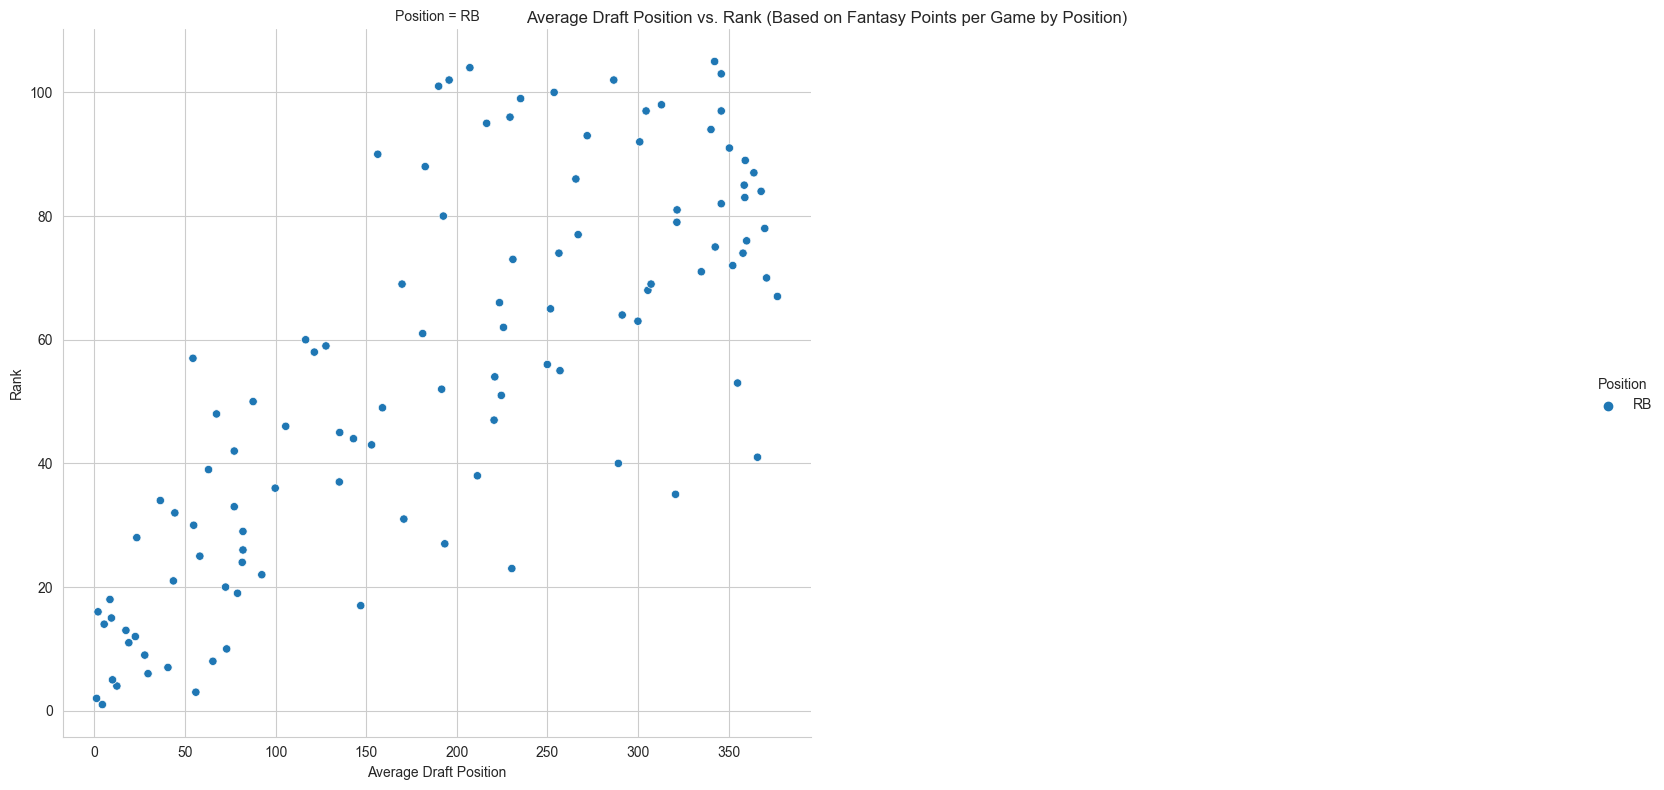

In [457]:
sns.set_style("whitegrid")
sns.set_palette("bright")

palette = {"RB":"tab:blue",
           "WR":"tab:red", 
           "QB":"tab:green","TE":"tab:orange"}

g = sns.relplot(data=rb_df, x='AverageDraftPosition', y='Rank', hue='Position', palette=palette, kind='scatter', col='Position', col_wrap=2, height=8, aspect=1)
g.fig.suptitle('Average Draft Position vs. Rank (Based on Fantasy Points per Game by Position)', fontsize=12)
g.set_axis_labels('Average Draft Position', 'Rank')



plt.show()





# Wide Reciever Visualization

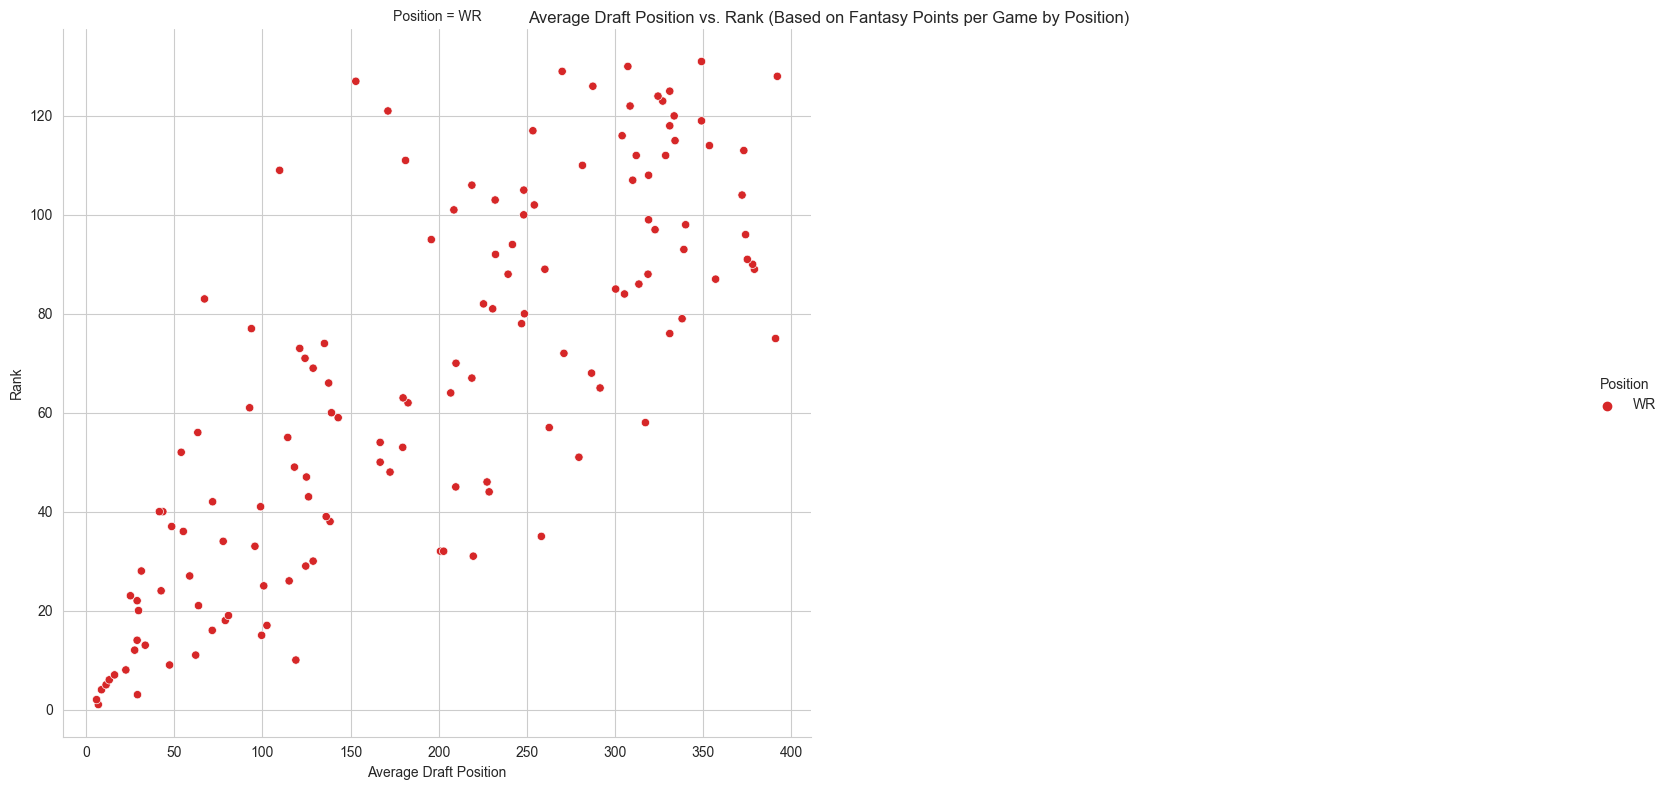

In [458]:
sns.set_style("whitegrid")
sns.set_palette("bright")

palette = {"RB":"tab:blue",
           "WR":"tab:red", 
           "QB":"tab:green","TE":"tab:orange"}

g = sns.relplot(data=wr_df, x='AverageDraftPosition', y='Rank', hue='Position', palette=palette, kind='scatter', col='Position', col_wrap=2, height=8, aspect=1)
g.fig.suptitle('Average Draft Position vs. Rank (Based on Fantasy Points per Game by Position)', fontsize=12)
g.set_axis_labels('Average Draft Position', 'Rank')



plt.show()

# Tight End Visualization

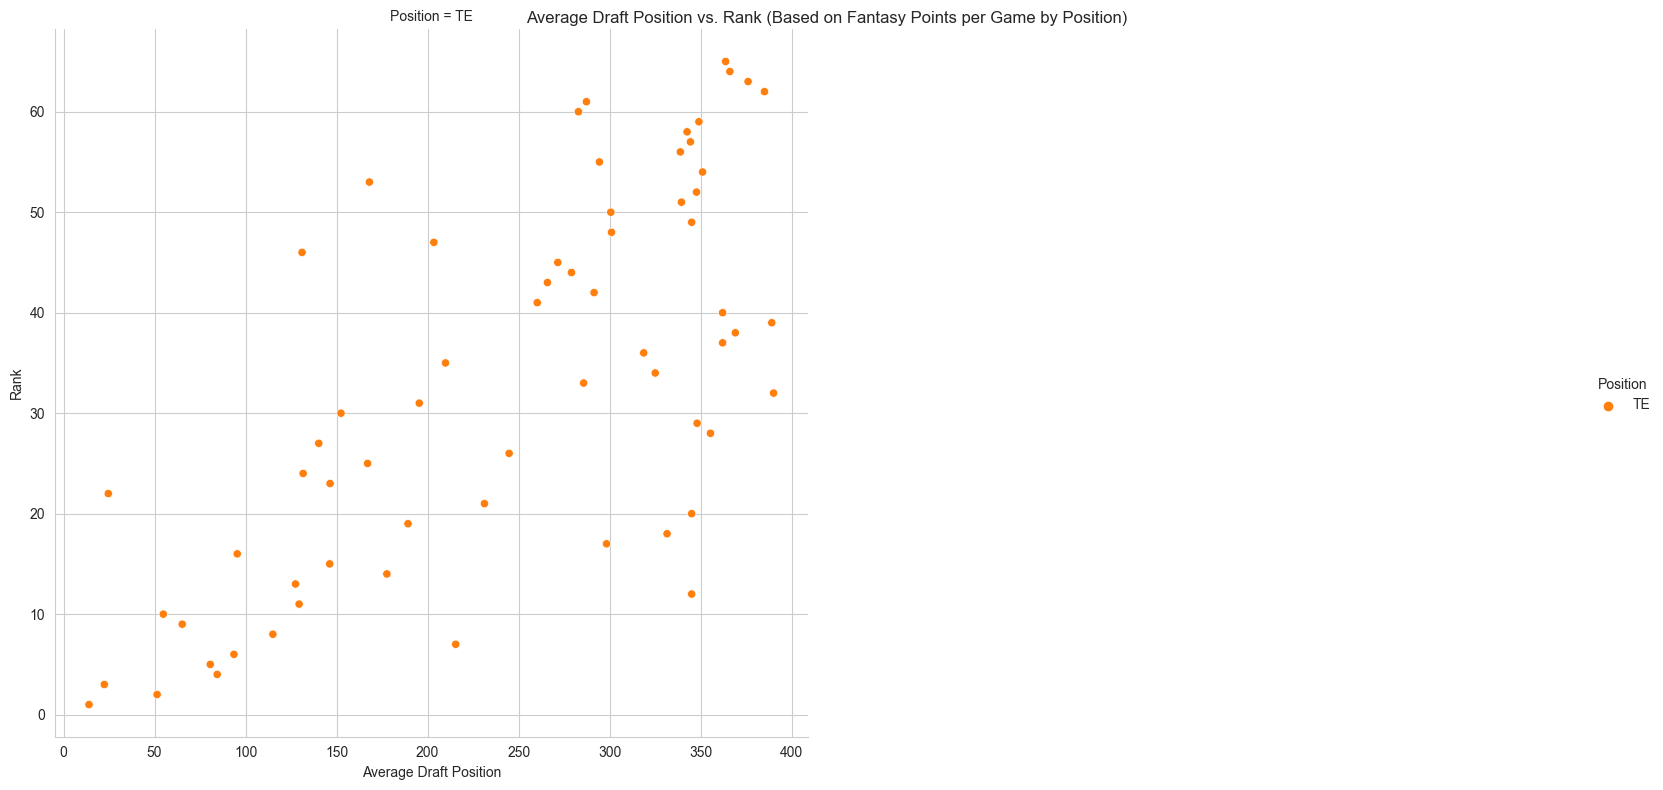

In [459]:
sns.set_style("whitegrid")
sns.set_palette("bright")

palette = {"RB":"tab:blue",
           "WR":"tab:red", 
           "QB":"tab:green","TE":"tab:orange"}

g = sns.relplot(data=te_df, x='AverageDraftPosition', y='Rank', hue='Position', palette=palette, kind='scatter', col='Position', col_wrap=2, height=8, aspect=1)
g.fig.suptitle('Average Draft Position vs. Rank (Based on Fantasy Points per Game by Position)', fontsize=12)
g.set_axis_labels('Average Draft Position', 'Rank')



plt.show()

# Quarterback Visualization

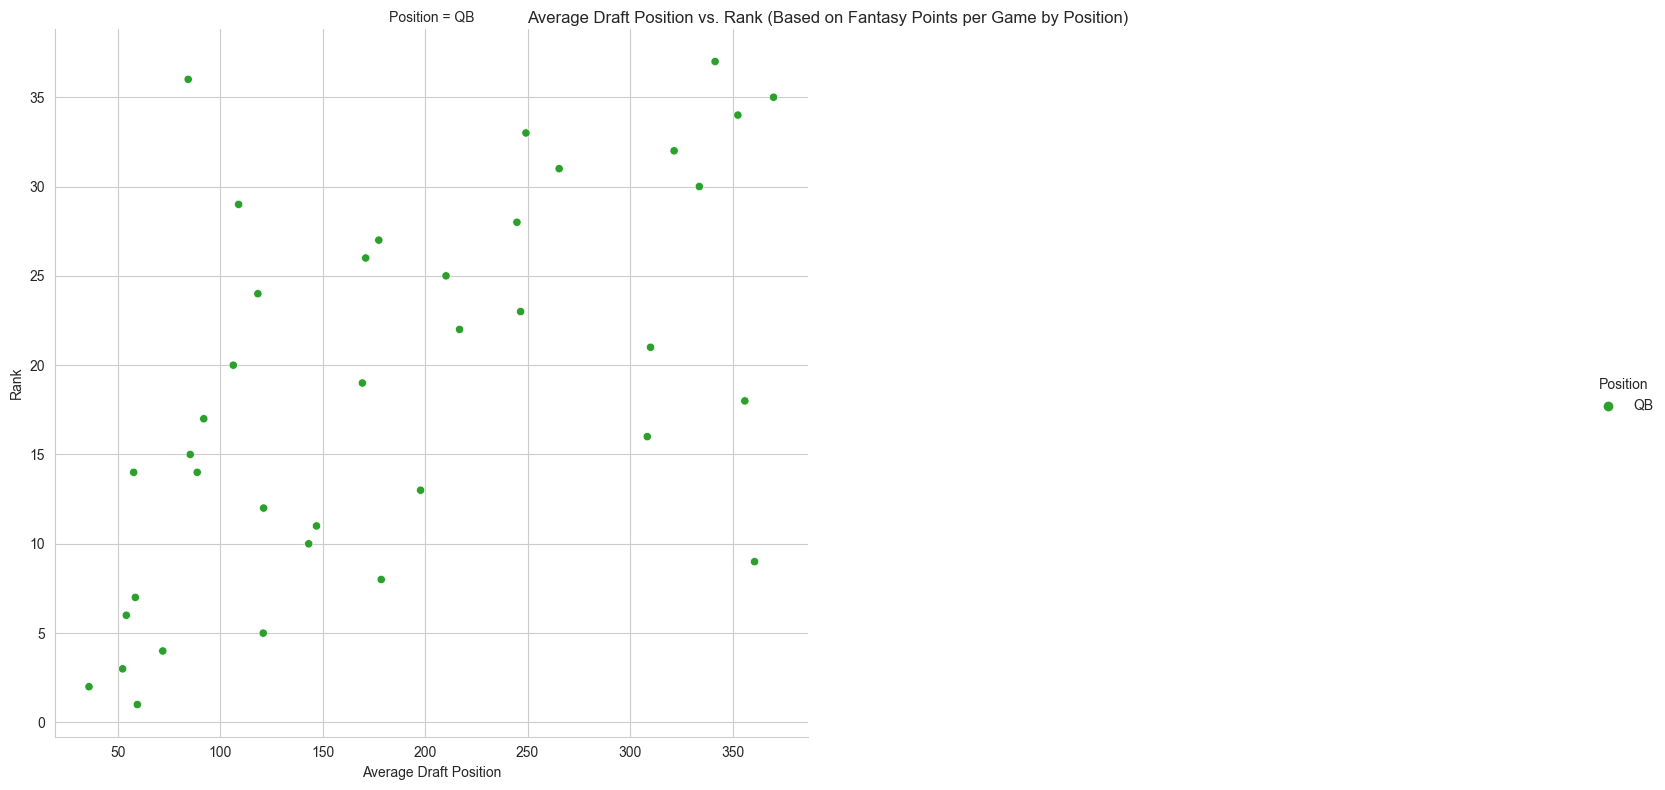

In [462]:
sns.set_style("whitegrid")
sns.set_palette("bright")

palette = {"RB":"tab:blue",
           "WR":"tab:red", 
           "QB":"tab:green","TE":"tab:orange"}

g = sns.relplot(data=qb_df, x='AverageDraftPosition', y='Rank', hue='Position', palette=palette, kind='scatter', col='Position', col_wrap=2, height=8, aspect=1)
g.fig.suptitle('Average Draft Position vs. Rank (Based on Fantasy Points per Game by Position)', fontsize=12)
g.set_axis_labels('Average Draft Position', 'Rank')



plt.show()

I will use the pd.concat to combine all the dataframes into one so I can view them in the same Plot all together.

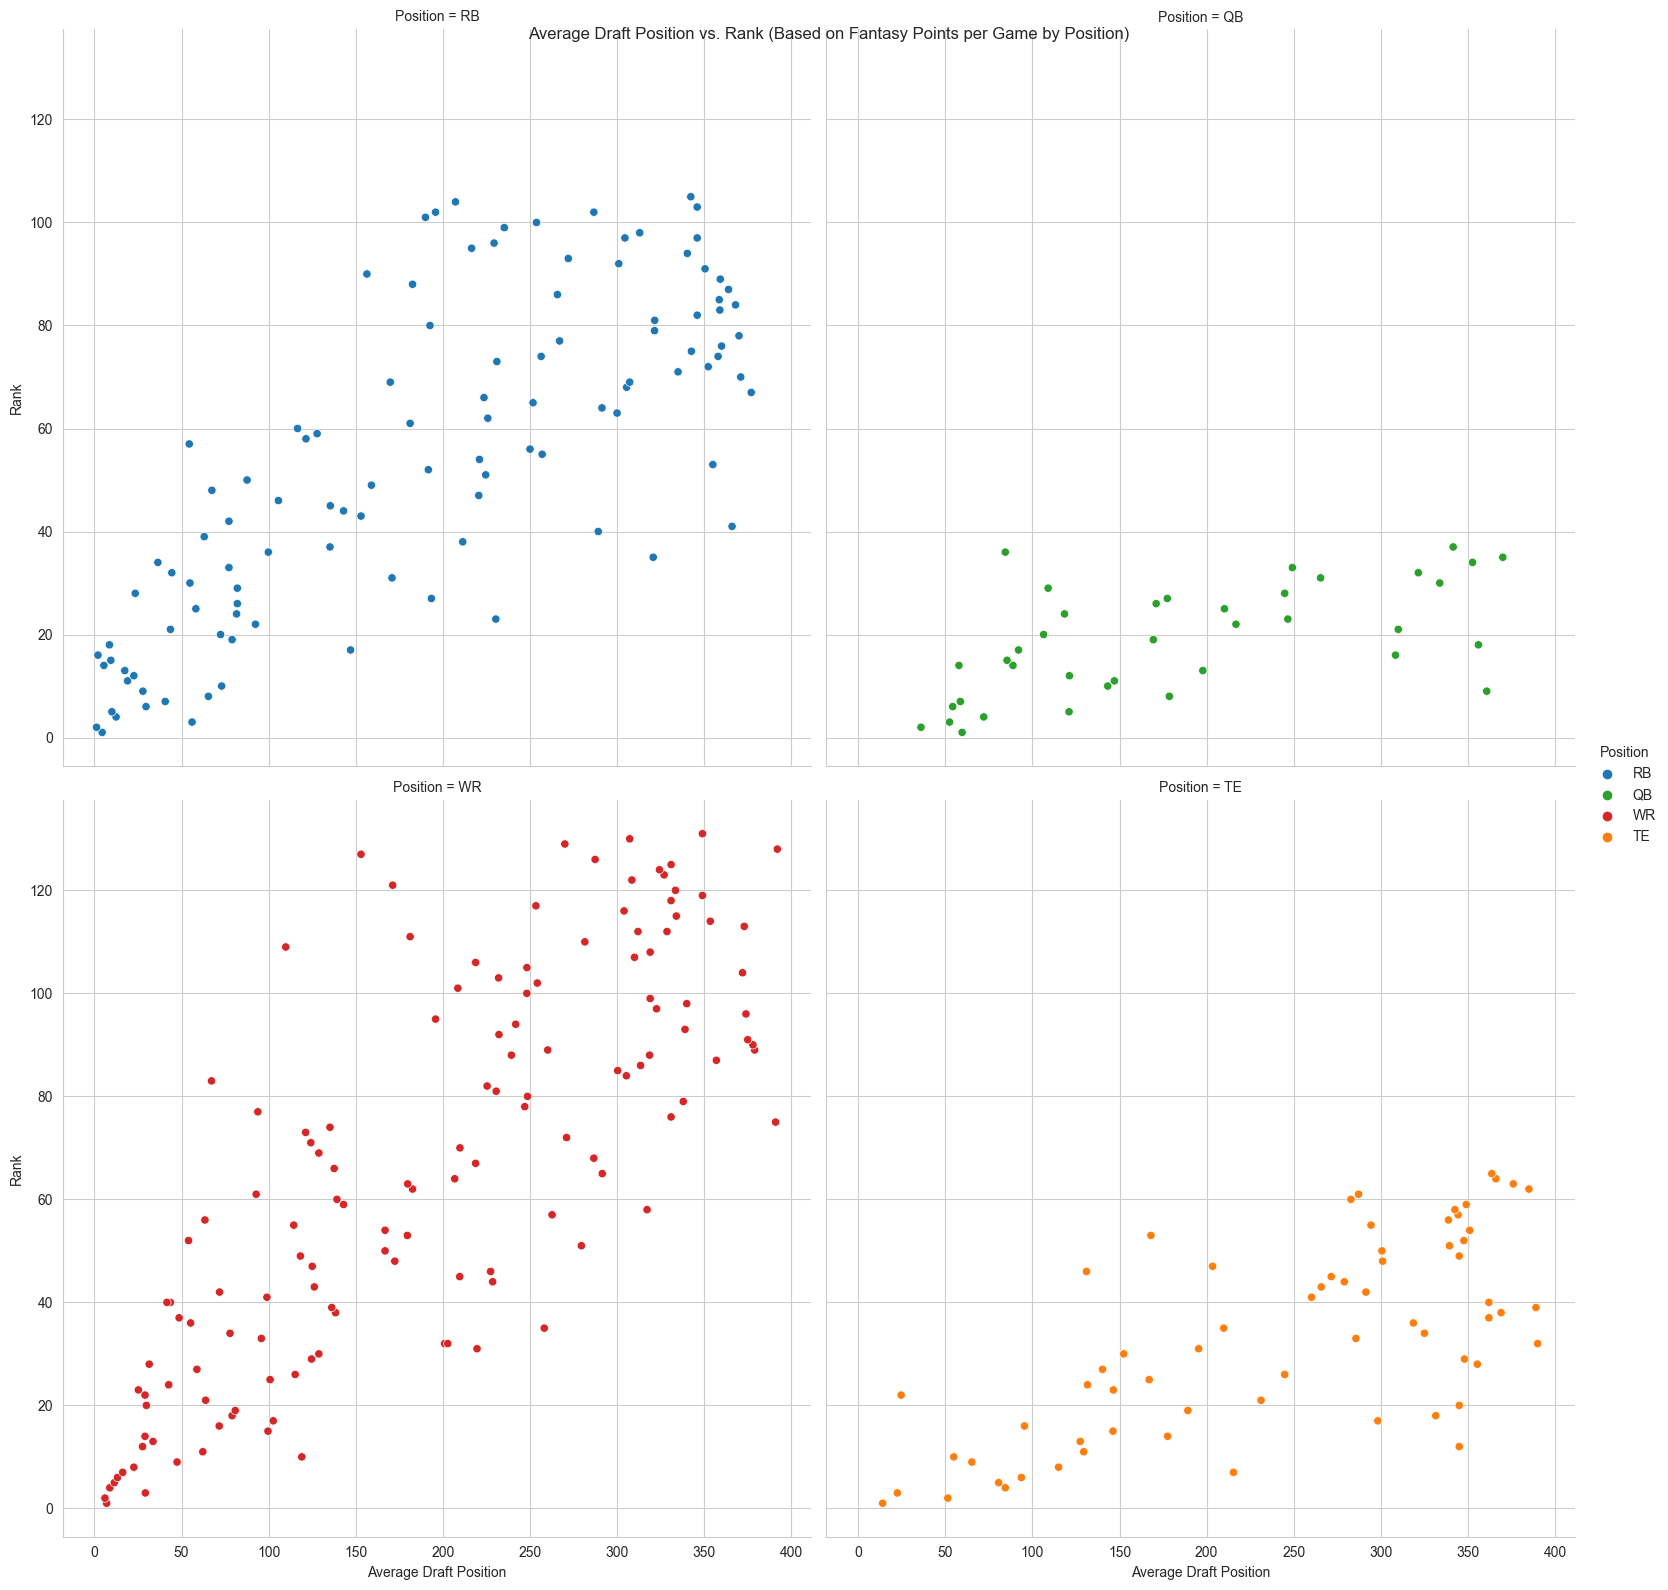

In [461]:
df_merged = pd.concat([rb_df, qb_df, wr_df, te_df], ignore_index=True, sort=False)

sns.set_style("whitegrid")
sns.set_palette("bright")

palette = {"RB":"tab:blue",
           "WR":"tab:red", 
           "QB":"tab:green","TE":"tab:orange"}

g = sns.relplot(data=df_merged, x='AverageDraftPosition', y='Rank', hue='Position', palette=palette, kind='scatter', col='Position', col_wrap=2, height=8, aspect=1)
g.fig.suptitle('Average Draft Position vs. Rank (Based on Fantasy Points per Game by Position)', fontsize=12)
g.set_axis_labels('Average Draft Position', 'Rank')









# Interpreting my Visulizations!

## So my results were as expected when I began this project, I knew there would be a regression as you got later into drafts. What I wanted to find from my data was how to prioritize the certain positions when I go into a draft. When looking at the data plots you can definitely see places late in the draft that you can find players that can bring a lot of value to your team. Looking at the tight end (TE) position, I can see that if I can get the top player at this position it can give me a significant advantage but if I miss and the player isn't the top of the position I may be in for a tough season. Looking at the ranking data vs the average draft position the TE position definitely goes downhill quick after the top 50. Looking at the data plots, quarterback (QB) is definitely a position I want to find later in the draft as there are many top finishers in the late parts of the draft. Looking at the data, I would priortize running back (RB) over Wide Reciever (WR) because there are more opportunies to get a top 20 finisher at the WR position in comparison to the RB as the draft progresses. I want to continue to develop this data into a model I can use for fantasy drafts in the future. I plan to build upon this project in the second half this course.